## Contour deformation 

In the context of GW method, contour deformation (CD) technique is used in conjunction with resolution of identity (RI) to reduce the formal scaling of the self-energy calculation. Compared to widely used analytic continuation approach it provides a means to evaluate self-energy  directly on the real axis without employing Pade approximants or non-linear least squares fit and potentially offering superior accuracy. Here, we provide a brief outline of the theory behind CD and give an example of the self-energy calculation within CD without invoking RI in order to facilitate comparison with the results prsented above. 

Detailed discussion of the CD can be found in the following papers:

1. Golze, D., Wilhelm, J., van Setten, M. J., & Rinke, P. (2018). Core-Level Binding Energies from GW : An Efficient Full-Frequency Approach within a Localized Basis. Journal of Chemical Theory and Computation, 14(9), 4856–4869. https://doi.org/10.1021/acs.jctc.8b00458

2. Giantomassi, M., Stankovski, M., Shaltaf, R., Grüning, M., Bruneval, F., Rinke, P., & Rignanese, G.-M. (2011). Electronic properties of interfaces and defects from many-body perturbation theory: Recent developments and applications. Physica Status Solidi (B), 248(2), 275–289. https://doi.org/10.1002/pssb.201046094

CD is used to recast the convolution in the GW expression of self-energy as a difference between two integrals, one which can be performed analytically whereas the other can be evaluated numerically on a relatively small grid. This is achieved by closing the inegration contour as shown below [2]:

![Integration contour used to evaluate $\Sigma(\omega)$](CD_scheme.jpg)

$$
\Sigma(r_1,r_2, \omega) = \frac{i}{2\pi} \int_{-\infty}^{+\infty} e^{i\omega^{\prime} \eta} G(r_1, r_2, \omega + \omega^{\prime}) W(r_1, r_2, \omega^{\prime}) d\omega^{\prime}\\ 
= \frac{i}{2\pi} \oint_{\Gamma} G(r_1, r_2, \omega + z) W(r_1, r_2, z) dz -  \frac{1}{2\pi} \int_{-\infty}^{+\infty} G(r_1, r_2, \omega + i\omega^{\prime}) W(r_1, r_2, i\omega^{\prime}) d\omega^{\prime}
$$

Depending on the $\omega$ value the lower-left and the upper-right loops of the contour can enclose one or several poles of the zero-order Green's function whereas the poles of the screened Coulomb interaction never fall within the contour. This allowes to evaluate the countour integral as a sum of corresponding residues with apropriate signs (note that the upper-right loop is traversed counter-clockwise, while the lower-left loop is traversed clockwise). The imaginary axis contribution is calculated using Gauss-Legendre grid. Importantly, the intgrals over the arches vanish iff the screened Coulomb interaction does not contain the exchange contribution.

In [3]:
import psi4
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from IPython.core.display import display, HTML

display(HTML("<style>.container {width:95% !important;}</style>"))


In [9]:
psi4.set_options({'basis' : 'def2-qzvp', 'd_convergence' : 1e-7,'scf_type' : 'out_of_core', 'dft_spherical_points' : 974, 'dft_radial_points' : 150 })

f_an = psi4.geometry("""
-1 1
F  0.0000000 0.0000000 0.0000000
symmetry c1
units angstrom
""")

In [10]:

psi4.set_output_file('f_qzvp.out')

scf_e, scf_wfn = psi4.energy('PBE0', return_wfn=True)

print("DFT energy is %16.10f" % scf_e)
epsilon = np.asarray(scf_wfn.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is   -99.7913248297
[-6.61063829e+02 -1.91757194e+01  5.50682920e-01  5.50682920e-01
  5.50682920e-01  1.73895088e+01  1.73895088e+01  1.73895088e+01
  2.36183815e+01  4.84673997e+01  4.84673997e+01  4.84673997e+01
  4.84673997e+01  4.84673997e+01  5.59565650e+01  5.59565650e+01
  5.59565650e+01  1.05425387e+02  1.25110289e+02  1.25110289e+02
  1.25110289e+02  1.25110289e+02  1.25110289e+02  1.25110289e+02
  1.25110289e+02  1.46727320e+02  1.46727320e+02  1.46727320e+02
  1.46727320e+02  1.46727320e+02  1.79389211e+02  1.79389211e+02
  1.79389211e+02  3.23123047e+02  3.23123047e+02  3.23123047e+02
  3.23123047e+02  3.23123047e+02  3.23123047e+02  3.23123047e+02
  3.23123047e+02  3.23123047e+02  4.05960027e+02  4.09021063e+02
  4.09021063e+02  4.09021063e+02  4.09021063e+02  4.09021063e+02
  4.09021063e+02  4.09021063e+02  4.41261382e+02  4.41261382e+02
  4.41261382e+02  4.41261382e+02  4.41261382e+02  1.46889599e+03
  7.75090376e+03]


Note: MOLGW produces broken symmetry result in this case! 
```
SCF Total Energy (Ha):      -99.5952223936
```

In [11]:
import GW

In [12]:
# Analytic calculation for reference purposes
gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'analytic_W' : True, 'gl_npoint' : 200, 'low_mem' : True }
gw_f = GW.GW_DFT(scf_wfn, f_an, gw_par)
gw_f.print_summary()

Number of basis functions:  57
occ/virt: 5/52
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  141
Fraction of HF exchange is  0.250
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Analytic W has been requested; performing RPA calculation
Shape of omega tensor is  (57, 57, 260)
Calculation of the integral term requires    0.065 Gb
Calculation of the residue term requires     0.164 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-1.52769723 -0.37452517 -0.20517252 -0.20517252 -0.20517252  0.12305649]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
  -673.624921    -671.752177       0.698280
   -22.471108     -22.219962       0.789146
    -2.560128      -2.670420       0.875722
    -2.718254      -2.670420       0.875722
    -2.876380    

Number of basis functions:  57
occ/virt: 5/52
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  141
Fraction of HF exchange is  0.000
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Analytic W has been requested; performing RPA calculation
Shape of omega tensor is  (57, 57, 260)
Calculation of the integral term requires    0.065 Gb
Calculation of the residue term requires     0.164 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-2.04637292 -0.51469157 -0.28584293 -0.28584293 -0.28584293  0.16130057]
Perfoming graphic solution of the inverse Dyson equation
Done!
Number of basis functions:  57
occ/virt: 5/52
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  141
Fraction of HF exchange is  0.25

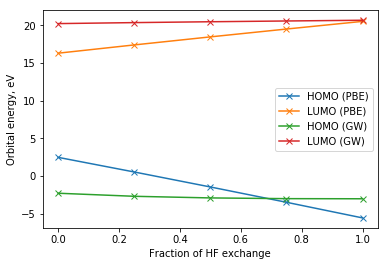

In [13]:
hf_xc  = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
homo_dft = []
lumo_dft = []
homo_gw = []
lumo_gw = []

ihomo = 4
ilumo = 5

for xc in hf_xc:
    pbeh = {
    "name": "GOLZE_PBE",
    "x_functionals": {"GGA_X_PBE": {"alpha": 1. - xc}},
    "x_hf": {"alpha": xc},
    "c_functionals": {"GGA_C_PBE": {}} }
    
    scf_e, scf_wfn = psi4.energy('SCF', return_wfn=True, dft_functional=pbeh)
    gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'analytic_W' : True, 'gl_npoint' : 200, 'low_mem' : True }
    gw_f = GW.GW_DFT(scf_wfn, f_an, gw_par)
    
    orb_e = np.asarray(scf_wfn.epsilon_a())
    homo_dft.append(orb_e[ihomo]*psi4.constants.hartree2ev)
    lumo_dft.append(orb_e[ilumo]*psi4.constants.hartree2ev)
    
    orb_e_gw = gw_f.qp_molgw_graph_
    homo_gw.append(orb_e_gw[ihomo]*psi4.constants.hartree2ev)
    lumo_gw.append(orb_e_gw[ilumo]*psi4.constants.hartree2ev)


    
plt.plot(hf_xc, homo_dft, 'x-', label='HOMO (PBE)')
plt.plot(hf_xc, lumo_dft, 'x-', label='LUMO (PBE)')
plt.plot(hf_xc, homo_gw, 'x-', label='HOMO (GW)')
plt.plot(hf_xc, lumo_gw, 'x-', label='LUMO (GW)')
#plt.plot(hf_xc, np.repeat(-7.9, 4), '--', label='Exp. IP' )
#plt.plot(hf_xc, np.repeat(-0.342, 4), '--', label='Exp. EA' )

plt.xlabel('Fraction of HF exchange')
plt.ylabel('Orbital energy, eV')

plt.legend()    
    


In [14]:
# evGW test 
scf_e, scf_wfn = psi4.energy('PBE0', return_wfn=True)
gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'analytic_W' : True, 'gl_npoint' : 200, 'low_mem' : True, 'evgw_iter' : 10 }
gw_f = GW.GW_DFT(scf_wfn, f_an, gw_par)
gw_f.print_summary()

Number of basis functions:  57
occ/virt: 5/52
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  141
Fraction of HF exchange is  0.250
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Analytic W has been requested; performing RPA calculation
Shape of omega tensor is  (57, 57, 260)
Calculation of the integral term requires    0.065 Gb
Calculation of the residue term requires     0.164 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-1.52769723 -0.37452517 -0.20517252 -0.20517252 -0.20517252  0.12305649]
Perfoming graphic solution of the inverse Dyson equation
Done!
Starting evGW loop...
Number of iterations is 10
[-679.05243793  -23.3516088    -3.00159991   -3.18216666   -3.3627334
   20.43318879]
[-680.13923673  -23.95175779   -3.39724196   -3.40218463   -3.39142912
   20.36266904